# Подключаем нужные библиотеки

In [33]:
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy import exp,sqrt
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

# Не забыть флажок и сравнить значения те что были и те что стали

# Попытка сгенерировать данные другим способом


In [31]:
import matplotlib.pyplot as plt
l = [0]
ls = [0]
import random
# random.seed(333333333333367812876123)
for i in range(1, 31*12*1):
    if i % 7:
        l.append(2 + random.random() * 7)
    elif i % 6:
        l.append(3 + random.random() * 5)
    elif i % 5:
        l.append(random.random() * 3)
    elif i % 4:
        l.append(random.random() * 1)
    elif i % 3:
        l.append(random.random() * 1)
    elif i % 2:
        l.append(random.random() * 2)
    else:
        l.append(random.random() * 3)
for v in l:
    ls.append(ls[-1] + v)
    
    
ls_ser = pd.Series(ls)
l_ser = pd.Series(l)

373


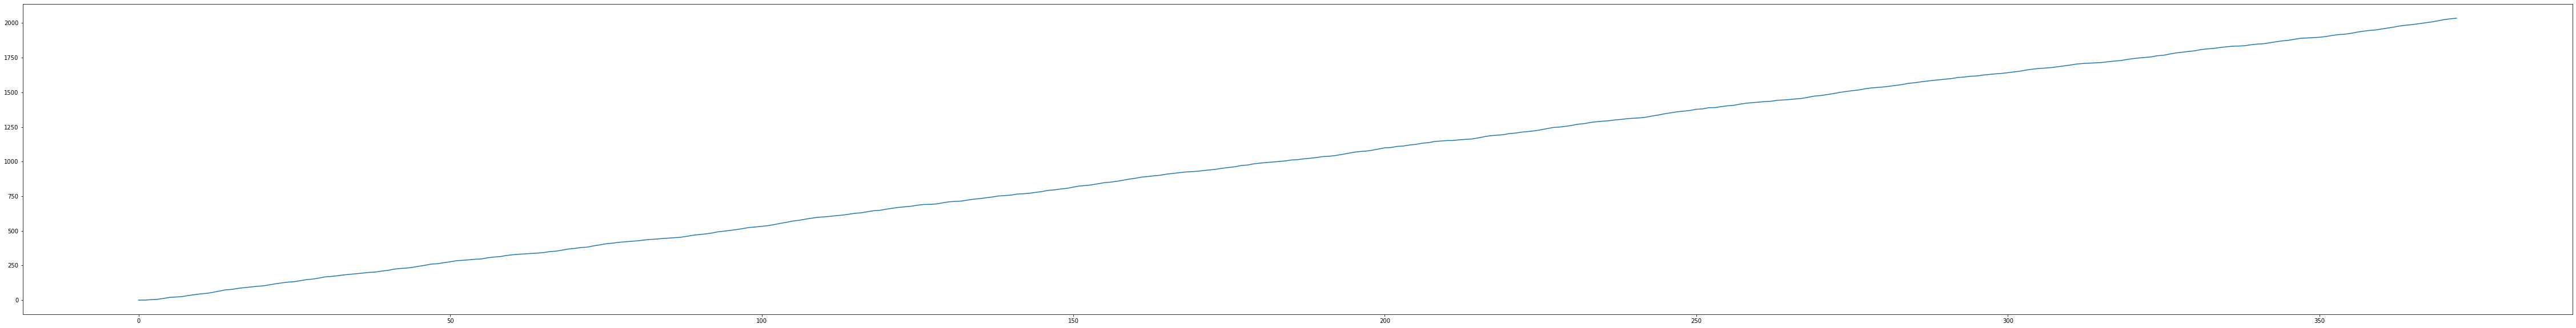

In [32]:
l_ser.plot(figsize=(80, 10))
plt.show()
l_ser.hist(bins=100)
plt.show()
ls_ser.plot(figsize=(80, 10))
print(len(ls_ser))

In [34]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

np.set_printoptions(threshold=300)

# Генерация данных 
value - это значение на конец дня.
абсолютное куммулятивное значение расхода ( энергоносителя, например воды)
date - это даты с 2018-01-01 по 2021-12-31 ( 4 года)


In [69]:
# генерируем данные таким способом, чтобы они были максимально приближены к реальному потреблению. 
# Например, первый месяц года потребления значительно меньше остальных,
# затем до самого лета чуть больше, летом естественно меньше и затем снова больше. Итак каждый год.
date = pd.date_range("2018-01-01", "2021-12-31")


integer_list1 = random.sample(range(0, 999000), 31)
integer_list2 = random.sample(range(0, 999000), 122)
integer_list3 = random.sample(range(0, 999000), 90)
integer_list4 = random.sample(range(0, 999000), 122)

integer_list5 = random.sample(range(0, 999000), 31)
integer_list6 = random.sample(range(0, 999000), 122)
integer_list7 = random.sample(range(0, 999000), 90)
integer_list8 = random.sample(range(0, 999000), 122)

integer_list9 = random.sample(range(0, 999000), 31)
integer_list10 = random.sample(range(0, 999000), 122)
integer_list11 = random.sample(range(0, 999000), 90)
integer_list12 = random.sample(range(0, 999000), 122)

integer_list13 = random.sample(range(0, 999000), 31)
integer_list14 = random.sample(range(0, 999000), 122)
integer_list15 = random.sample(range(0, 999000), 90)
integer_list16 = random.sample(range(0, 999000), 123)



integer_list = integer_list1 + integer_list2 + integer_list3+integer_list4+integer_list5+integer_list6+integer_list7+integer_list8+integer_list9+integer_list10+integer_list11+integer_list12+integer_list13+integer_list14+integer_list15+integer_list16
value = [x/1000 for x in integer_list]
data = {'date':pd.date_range("2018-01-01", "2021-12-31"), 'value': [x/1000 for x in integer_list]}
table= pd.DataFrame(data)

summ = []
sum = 0 
value = table['value']
for i in value:
    sum += i
    summ.append(sum)
#print(summ)   

table['value'] = summ  

# сохраняем все в файл

table.to_csv('C:/pythonushka/my_new_file1.csv', index=False)

#выводим на экран
print(table)

           date       value
0    2018-01-01     109.177
1    2018-01-02     920.884
2    2018-01-03    1787.594
3    2018-01-04    2718.009
4    2018-01-05    3331.804
5    2018-01-06    4099.479
6    2018-01-07    5024.568
7    2018-01-08    5281.005
8    2018-01-09    5568.541
9    2018-01-10    6214.113
10   2018-01-11    6744.537
11   2018-01-12    7495.955
12   2018-01-13    7744.675
13   2018-01-14    8319.062
14   2018-01-15    8492.223
15   2018-01-16    9043.826
16   2018-01-17    9693.167
17   2018-01-18   10612.645
18   2018-01-19   11525.138
19   2018-01-20   11535.608
20   2018-01-21   11906.697
21   2018-01-22   12429.195
22   2018-01-23   12637.331
23   2018-01-24   12916.968
24   2018-01-25   13842.547
25   2018-01-26   14682.078
26   2018-01-27   14871.879
27   2018-01-28   15308.116
28   2018-01-29   15950.596
29   2018-01-30   16272.687
30   2018-01-31   16685.642
31   2018-02-01   17522.366
32   2018-02-02   18006.328
33   2018-02-03   18343.997
34   2018-02-04   18

# 3 вида графиков предствляющие эти данные

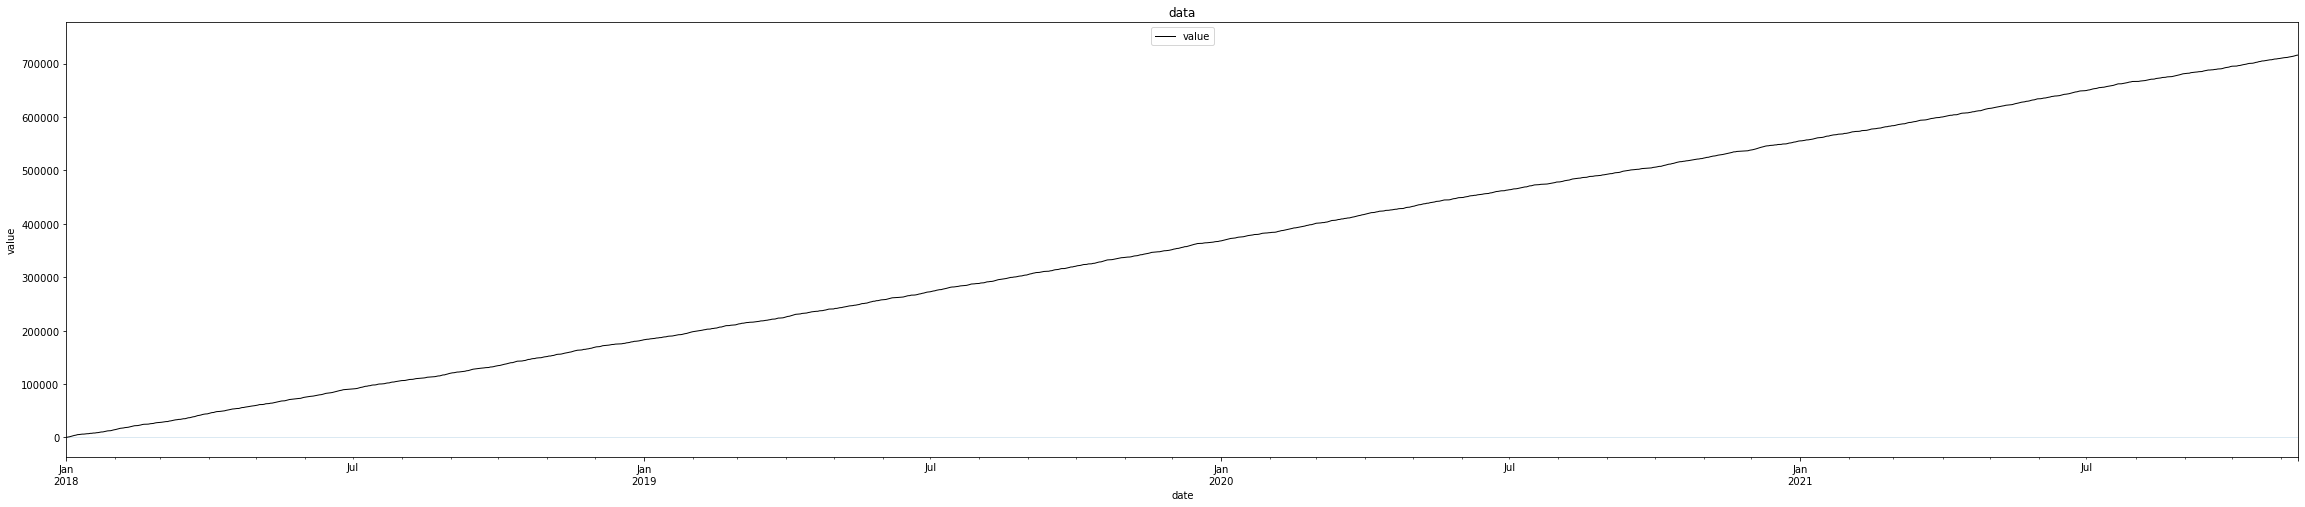

In [36]:
url = 'C:/pythonushka/my_new_file1.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

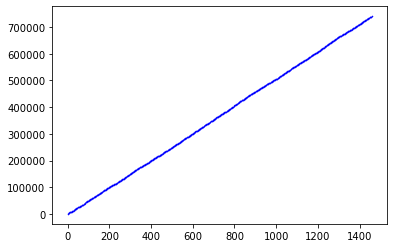

In [37]:
x = table.index.values  
y = table['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

In [38]:
table.plot.bar(x='date', y='value', figsize=(400,5))

<AxesSubplot:xlabel='date'>

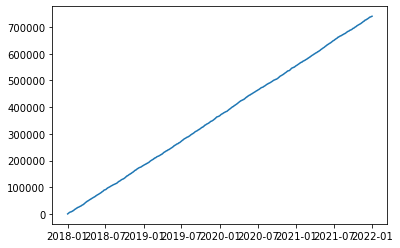

In [39]:
x = table['date']
y = table['value']
plt.plot(x, y)
plt.show()


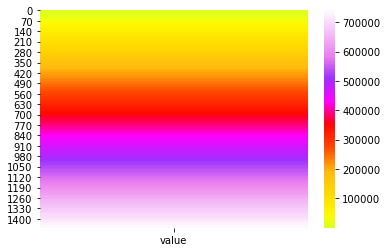

In [40]:
data = pd.DataFrame(table['value'], columns=["value"])
# Plot the heatmap
heatmap_plot = sns.heatmap(data, center=0, cmap='gist_ncar')

plt.show()

# Удалим 20% данных и создадим пропуски по неделе - месяцу 

In [70]:
df = pd.read_csv('C:/pythonushka/my_new_file1.csv')

df = pd.DataFrame( summ,
                      columns=["value"],
                      index=date)


df = df.drop(df[(df.index > '2018-01-01') & (df.index < '2018-01-15')].index) # 1:16
df = df.drop(df[(df.index > '2018-06-15') & (df.index < '2018-06-30')].index) # 
df = df.drop(df[(df.index > '2018-12-25') & (df.index < '2018-01-31')].index) # 
df = df.drop(df[(df.index > '2019-02-12') & (df.index < '2019-02-22')].index) # 
df = df.drop(df[(df.index > '2019-08-01') & (df.index < '2019-09-01')].index) # 
df = df.drop(df[(df.index > '2019-12-12') & (df.index < '2019-12-18')].index) # 
df = df.drop(df[(df.index > '2020-05-12') & (df.index < '2020-05-19')].index) #  
df = df.drop(df[(df.index > '2020-06-12') & (df.index < '2020-06-19')].index) # 
df = df.drop(df[(df.index > '2021-12-25') & (df.index < '2021-12-31')].index) # 
#print(df)

df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
#print(df.isna().sum())
#print(df)

df = df.iloc[np.random.permutation(len(df))]
df['date'] = df.index
index = [i for i in range(df.shape[0])]
random.shuffle(index)
df = df.set_index([index]).sort_index()
#print(df)

#df.pop('date')
#print(df)
#df['value']

df1 = {'date':pd.date_range("2018-01-01", "2021-12-31"), 'value': np.nan }
df1 = pd.DataFrame(df1)
#df1 = df1.set_index(df1['date']).sort_index()
#df1.pop('date')
#print(df1)

df1['value'] = df1['date'].map(df.set_index('date')['value'])
df1.to_csv('C:/pythonushka/my_new_file999.csv', index=False)
#print(df1)
#print(df.isna().sum())
print(df1)



datanan = df1
datanan.fillna(0, inplace=True)
nana = []
nana.append(datanan['value'])
NAN = []

for i in range(len(datanan)):
    if i <= 1:
        NAN.append(datanan.index)
#print(NAN)
#datanan['nan'] = NAN
#print(datanan)

Nan = {'nan': NAN}
NANA= pd.DataFrame(Nan)
print(NANA)

           date       value
0    2018-01-01     109.177
1    2018-01-02         NaN
2    2018-01-03         NaN
3    2018-01-04         NaN
4    2018-01-05         NaN
5    2018-01-06         NaN
6    2018-01-07         NaN
7    2018-01-08         NaN
8    2018-01-09         NaN
9    2018-01-10         NaN
10   2018-01-11         NaN
11   2018-01-12         NaN
12   2018-01-13         NaN
13   2018-01-14         NaN
14   2018-01-15         NaN
15   2018-01-16         NaN
16   2018-01-17         NaN
17   2018-01-18   10612.645
18   2018-01-19   11525.138
19   2018-01-20   11535.608
20   2018-01-21         NaN
21   2018-01-22   12429.195
22   2018-01-23         NaN
23   2018-01-24   12916.968
24   2018-01-25         NaN
25   2018-01-26   14682.078
26   2018-01-27   14871.879
27   2018-01-28   15308.116
28   2018-01-29   15950.596
29   2018-01-30   16272.687
30   2018-01-31         NaN
31   2018-02-01   17522.366
32   2018-02-02   18006.328
33   2018-02-03         NaN
34   2018-02-04   18

In [42]:
#df1.fillna(0)
#df1.to_csv('C:/pythonushka/my_new_file999.csv', index=False)


# Проиллюстрируем пропусченные дынные

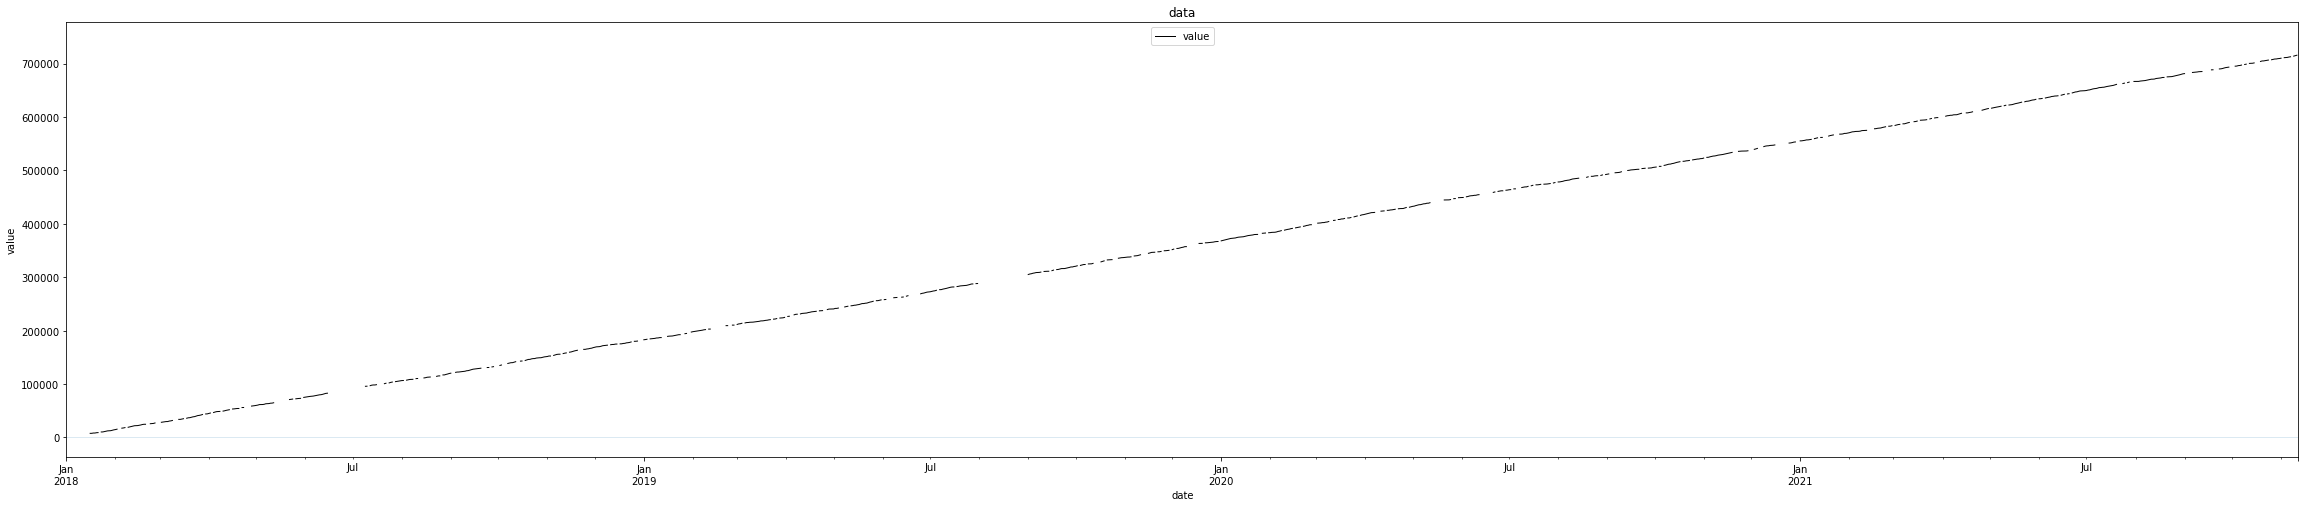

In [54]:

url = 'C:/pythonushka/my_new_file999.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

In [55]:
x = df1.index.values  
y = df1['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

In [56]:
x = df1['date']
y = df1['value']
plt.plot(x, y)
plt.show()


<AxesSubplot:xlabel='date'>

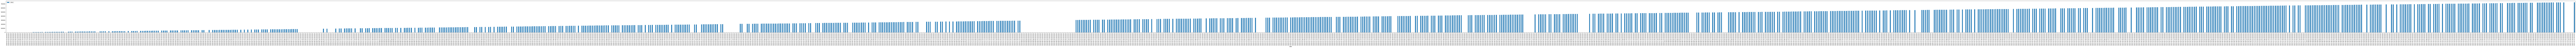

In [57]:
df1.plot.bar(x='date', y='value', figsize=(400,5))

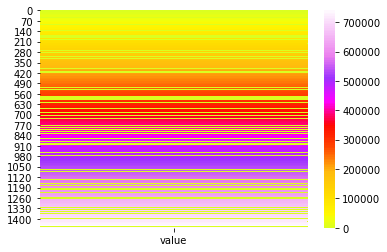

In [58]:
data = pd.DataFrame(df1['value'], columns=["value"])
# Plot the heatmap
heatmap_plot = sns.heatmap(data, center=0, cmap='gist_ncar')

plt.show()

# Восстановим пропущенные данные


# 1. Интерполяция данных


In [85]:
df1 = pd.read_csv('C:/pythonushka/my_new_file999.csv')
df1 = df1.set_index('date')
df1 


value
date                  
2018-01-01     109.177
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06         NaN
2018-01-07         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-13         NaN
2018-01-14         NaN
2018-01-15         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18   10612.645
2018-01-19   11525.138
2018-01-20   11535.608
2018-01-21         NaN
2018-01-22   12429.195
2018-01-23         NaN
2018-01-24   12916.968
2018-01-25         NaN
2018-01-26   14682.078
2018-01-27   14871.879
2018-01-28   15308.116
2018-01-29   15950.596
2018-01-30   16272.687
2018-01-31         NaN
2018-02-01   17522.366
2018-02-02   18006.328
2018-02-03         NaN
2018-02-04   18716.927
2018-02-05   19379.687
2018-02-06   20362.616
2018-02-07   21042.101
2018-02-08   21895.131
2018-02-09   22093.352
2018-02-10   22618.484
2018-02-11         NaN
2018-02-12   23421.577
2018-02-13   24031.399
2018-02-14   24618.195
2018-02-15   25088.585
2018-02-16   25479.483
2018-02-17   26136.377
2018-02-18   26406.822
2018-02-19         NaN
...                ...
2021-11-12  711680.330
2021-11-13         NaN
2021-11-14  712494.995
2021-11-15  712675.907
2021-11-16         NaN
2021-11-17  713709.716
2021-11-18  714687.350
2021-11-19         NaN
2021-11-20  716379.408
2021-11-21  717158.414
2021-11-22  717300.298
2021-11-23  717749.788
2021-11-24  718222.321
2021-11-25         NaN
2021-11-26  719423.106
2021-11-27  719450.056
2021-11-28  719470.932
2021-11-29         NaN
2021-11-30  720740.209
2021-12-01  721200.598
2021-12-02         NaN
2021-12-03         NaN
2021-12-04         NaN
2021-12-05  723467.832
2021-12-06  724257.720
2021-12-07  724546.353
2021-12-08         NaN
2021-12-09  724970.532
2021-12-10  725859.425
2021-12-11  726549.502
2021-12-12  726601.775
2021-12-13  727241.560
2021-12-14  728072.405
2021-12-15  728869.327
2021-12-16         NaN
2021-12-17  730114.801
2021-12-18         NaN
2021-12-19         NaN
2021-12-20  731151.971
2021-12-21  731567.160
2021-12-22  732300.528
2021-12-23  732662.646
2021-12-24  733539.362
2021-12-25  734022.785
2021-12-26         NaN
2021-12-27         NaN
2021-12-28         NaN
2021-12-29         NaN
2021-12-30         NaN
2021-12-31  736982.395

[1461 rows x 1 columns]

In [86]:
df.interpolate(method ='linear', limit_direction ='backward')

date       value
0        0     109.177
17      17   10612.645
18      18   11525.138
19      19   11535.608
21      21   12429.195
23      23   12916.968
25      25   14682.078
26      26   14871.879
27      27   15308.116
28      28   15950.596
29      29   16272.687
31      31   17522.366
32      32   18006.328
34      34   18716.927
35      35   19379.687
36      36   20362.616
37      37   21042.101
38      38   21895.131
39      39   22093.352
40      40   22618.484
42      42   23421.577
43      43   24031.399
44      44   24618.195
45      45   25088.585
46      46   25479.483
47      47   26136.377
48      48   26406.822
50      50   27284.279
51      51   27401.931
52      52   28241.289
53      53   29239.761
54      54   29240.712
55      55   29581.729
56      56   30212.429
57      57   30485.617
58      58   31461.784
60      60   31883.577
62      62   33752.864
63      63   34233.655
64      64   35028.733
65      65   35452.051
66      66   35595.510
68      68   36579.704
69      69   37101.501
70      70   37593.728
71      71   38442.226
74      74   40276.999
76      76   41178.682
77      77   41206.247
78      78   41914.903
...    ...         ...
1392  1392  702284.667
1394  1394  703211.694
1395  1395  703665.935
1396  1396  704415.500
1397  1397  704849.922
1398  1398  705396.050
1399  1399  705434.012
1400  1400  705762.254
1401  1401  706114.115
1402  1402  706910.251
1403  1403  706916.746
1405  1405  708297.253
1406  1406  709288.771
1407  1407  710103.301
1408  1408  710456.867
1409  1409  711071.098
1410  1410  711075.933
1411  1411  711680.330
1413  1413  712494.995
1414  1414  712675.907
1416  1416  713709.716
1417  1417  714687.350
1419  1419  716379.408
1420  1420  717158.414
1421  1421  717300.298
1422  1422  717749.788
1423  1423  718222.321
1425  1425  719423.106
1426  1426  719450.056
1427  1427  719470.932
1429  1429  720740.209
1430  1430  721200.598
1434  1434  723467.832
1435  1435  724257.720
1436  1436  724546.353
1438  1438  724970.532
1439  1439  725859.425
1440  1440  726549.502
1441  1441  726601.775
1442  1442  727241.560
1443  1443  728072.405
1444  1444  728869.327
1446  1446  730114.801
1449  1449  731151.971
1450  1450  731567.160
1451  1451  732300.528
1452  1452  732662.646
1453  1453  733539.362
1454  1454  734022.785
1460  1460  736982.395

[1100 rows x 2 columns]

In [87]:
df1 = df1.interpolate(method ='linear', limit_direction ='backward')
df1.to_csv('C:/pythonushka/dateindex.csv', index=False)
print(df1)
print(table)

                    value
date                     
2018-01-01     109.177000
2018-01-02     727.028059
2018-01-03    1344.879118
2018-01-04    1962.730176
2018-01-05    2580.581235
2018-01-06    3198.432294
2018-01-07    3816.283353
2018-01-08    4434.134412
2018-01-09    5051.985471
2018-01-10    5669.836529
2018-01-11    6287.687588
2018-01-12    6905.538647
2018-01-13    7523.389706
2018-01-14    8141.240765
2018-01-15    8759.091824
2018-01-16    9376.942882
2018-01-17    9994.793941
2018-01-18   10612.645000
2018-01-19   11525.138000
2018-01-20   11535.608000
2018-01-21   11982.401500
2018-01-22   12429.195000
2018-01-23   12673.081500
2018-01-24   12916.968000
2018-01-25   13799.523000
2018-01-26   14682.078000
2018-01-27   14871.879000
2018-01-28   15308.116000
2018-01-29   15950.596000
2018-01-30   16272.687000
2018-01-31   16897.526500
2018-02-01   17522.366000
2018-02-02   18006.328000
2018-02-03   18361.627500
2018-02-04   18716.927000
2018-02-05   19379.687000
2018-02-06  

In [88]:
x = df1.index.values  
y = df1['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

<AxesSubplot:xlabel='date'>

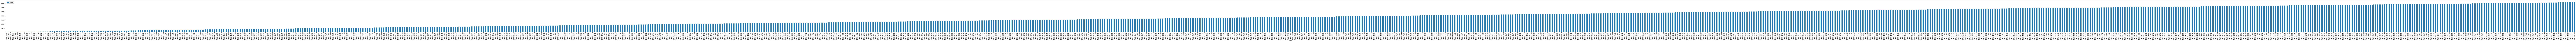

In [89]:
df1['date'] = df1.index
df1.to_csv('C:/pythonushka/datenotindex.csv', index=False)
df1.plot.bar(x='date', y='value', figsize=(400,5))

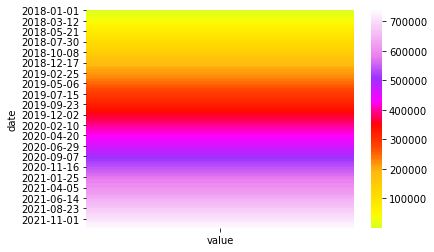

In [90]:
data = pd.DataFrame(df1['value'], columns=["value"])
# Plot the heatmap
heatmap_plot = sns.heatmap(data, center=0, cmap='gist_ncar')

plt.show()

In [91]:
#df2 = df1
#change = []
#a = df1['value']
#b = tabel['value']
#if a != b:
#    change.append(changed)
#df2['value_change'] = change
#df2

In [92]:
#                         МНК(метод наименьших квадратов)

df2 = pd.read_csv('C:/pythonushka/my_new_file999.csv')

df2['xi'] = df2.index

#df2.pop('xi')
#df2['yi']= df2['value']

df2['xiyi'] = df2['value']*df2['xi']
xiyi = df2['xiyi'].sum()
yi = df2['value'].sum()
xi = df2['xi'].sum()
xi2 = (df2['xi']*df2['xi']).sum()
n = 1460


a = (xiyi*n - yi*xi)/(n*xi2-xi**2)
b = (yi - a*xi)/n
print(xiyi*n)
print(yi*xi)

598764398727678.6
446569419282924.4


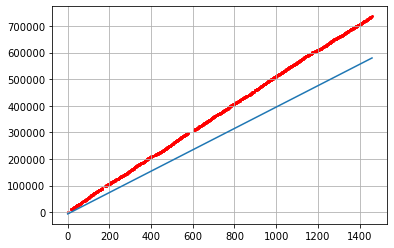

[ -6833.97056891  -6432.02212381  -6030.07367872 ... 579206.86237609
 579608.81082119 580010.75926628]


In [93]:
#                   Нахождение прямой
N = len(df2)
sigma = df2['value'].std(skipna = True)


f = np.array([a*z+b for z in range(N)])

y = df2['value']
x = np.array(range(N))

#mx = x.sum()/N
#my = y.sum()/N
#a2 = np.dot(x.T, x)/N
#a11 = np.dot(x.T, y)/N

#kk = (a11 - mx*my)/(a2 - ma**2)
#bb = my - kk*mx

#ff = np.array([kk*z+bb for z in range(N)])

plt.plot(f)
#plt.plot(ff, c='green')
plt.scatter(x, y, s=4, c='red')
plt.grid(True)
plt.show()
print(f)



In [129]:
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.read_csv('C:/pythonushka/my_new_file999.csv')
df['date'] = df.index
imp = SimpleImputer(strategy="mean")
print(imp.fit_transform(df))

[[0.00000000e+00 1.09177000e+02]
 [1.00000000e+00 3.80647707e+05]
 [2.00000000e+00 3.80647707e+05]
 ...
 [1.45800000e+03 3.80647707e+05]
 [1.45900000e+03 3.80647707e+05]
 [1.46000000e+03 7.36982395e+05]]


# Линейная регрессия

In [96]:
data=pd.read_csv('C:/pythonushka/my_new_file999.csv')
#data['date'] = pd.to_datetime(data['date'])
data['date'] = data.index

N = len(data)
x = np.array(range(N))

to_timestamp_fct = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()    
#data['date'] = data['date'].apply(to_timestamp_fct)

test_data = data[data['value'].isnull()]
#print(test_data)
train_data = data.dropna(inplace=False)
#print(train_data)

X_train = train_data.drop("value", axis=1)
#print(X_train)
y_train = train_data['value']
#print(y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

X_test = test_data.drop("value", axis=1)
#print(X_test)
y_test = test_data['value']
#print(y_test)

y_pred = lr.predict(X_test)
test_data.loc[test_data.value.isnull(), 'value'] = y_pred
test_data

C:\Python\Anaconda3.8\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


date          value
1        1    5178.334321
2        2    5682.310217
3        3    6186.286113
4        4    6690.262009
5        5    7194.237905
6        6    7698.213801
7        7    8202.189697
8        8    8706.165593
9        9    9210.141489
10      10    9714.117385
11      11   10218.093281
12      12   10722.069177
13      13   11226.045073
14      14   11730.020969
15      15   12233.996865
16      16   12737.972761
20      20   14753.876344
22      22   15761.828136
24      24   16769.779928
30      30   19793.635304
33      33   21305.562992
41      41   25337.370160
49      49   29369.177327
59      59   34408.936287
61      61   35416.888079
67      67   38440.743455
72      72   40960.622935
73      73   41464.598831
75      75   42472.550623
80      80   44992.430103
82      82   46000.381894
90      90   50032.189062
94      94   52048.092646
95      95   52552.068542
98      98   54063.996230
103    103   56583.875710
107    107   58599.779294
108    108   59103.755190
109    109   59607.731086
110    110   60111.706982
125    125   67671.345421
130    130   70191.224901
131    131   70695.200797
136    136   73215.080277
142    142   76238.935653
143    143   76742.911549
146    146   78254.839236
157    157   83798.574092
166    166   88334.357156
167    167   88838.333052
...    ...            ...
1228  1228  623556.758675
1230  1230  624564.710467
1233  1233  626076.638155
1234  1234  626580.614051
1243  1243  631116.397114
1246  1246  632628.324802
1250  1250  634644.228386
1252  1252  635652.180178
1268  1268  643715.794514
1270  1270  644723.746306
1277  1277  648251.577577
1281  1281  650267.481161
1297  1297  658331.095497
1299  1299  659339.047289
1303  1303  661354.950873
1305  1305  662362.902665
1309  1309  664378.806248
1312  1312  665890.733936
1318  1318  668914.589312
1324  1324  671938.444688
1336  1336  677986.155440
1348  1348  684033.866191
1350  1350  685041.817983
1351  1351  685545.793879
1354  1354  687057.721567
1362  1362  691089.528735
1366  1366  693105.432319
1371  1371  695625.311799
1377  1377  698649.167174
1388  1388  704192.902030
1391  1391  705704.829718
1393  1393  706712.781510
1404  1404  712256.516365
1412  1412  716288.323533
1415  1415  717800.251221
1418  1418  719312.178909
1424  1424  722336.034285
1428  1428  724351.937869
1431  1431  725863.865557
1432  1432  726367.841453
1433  1433  726871.817349
1437  1437  728887.720932
1445  1445  732919.528100
1447  1447  733927.479892
1448  1448  734431.455788
1455  1455  737959.287060
1456  1456  738463.262956
1457  1457  738967.238852
1458  1458  739471.214748
1459  1459  739975.190644

[361 rows x 2 columns]

In [130]:
data=pd.read_csv('C:/pythonushka/my_new_file999.csv')
data['date'] = pd.to_datetime(data['date'])
data['date'] = data.index
df = data

test_data = df[df['value'].isnull()]
df.dropna(inplace=True)
y_train= df['value']
X_train = df.drop('value', axis = 1)
X_train.shape
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
X_test = test_data.drop('value', axis=1)
#print(X_test)
y_pred = lr.predict(X_test)
#print(y_pred)
test_data.loc[test_data.value.isnull(), 'value'] = y_pred
test_data

C:\Python\Anaconda3.8\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


date          value
1        1    5178.334321
2        2    5682.310217
3        3    6186.286113
4        4    6690.262009
5        5    7194.237905
6        6    7698.213801
7        7    8202.189697
8        8    8706.165593
9        9    9210.141489
10      10    9714.117385
11      11   10218.093281
12      12   10722.069177
13      13   11226.045073
14      14   11730.020969
15      15   12233.996865
16      16   12737.972761
20      20   14753.876344
22      22   15761.828136
24      24   16769.779928
30      30   19793.635304
33      33   21305.562992
41      41   25337.370160
49      49   29369.177327
59      59   34408.936287
61      61   35416.888079
67      67   38440.743455
72      72   40960.622935
73      73   41464.598831
75      75   42472.550623
80      80   44992.430103
82      82   46000.381894
90      90   50032.189062
94      94   52048.092646
95      95   52552.068542
98      98   54063.996230
103    103   56583.875710
107    107   58599.779294
108    108   59103.755190
109    109   59607.731086
110    110   60111.706982
125    125   67671.345421
130    130   70191.224901
131    131   70695.200797
136    136   73215.080277
142    142   76238.935653
143    143   76742.911549
146    146   78254.839236
157    157   83798.574092
166    166   88334.357156
167    167   88838.333052
...    ...            ...
1228  1228  623556.758675
1230  1230  624564.710467
1233  1233  626076.638155
1234  1234  626580.614051
1243  1243  631116.397114
1246  1246  632628.324802
1250  1250  634644.228386
1252  1252  635652.180178
1268  1268  643715.794514
1270  1270  644723.746306
1277  1277  648251.577577
1281  1281  650267.481161
1297  1297  658331.095497
1299  1299  659339.047289
1303  1303  661354.950873
1305  1305  662362.902665
1309  1309  664378.806248
1312  1312  665890.733936
1318  1318  668914.589312
1324  1324  671938.444688
1336  1336  677986.155440
1348  1348  684033.866191
1350  1350  685041.817983
1351  1351  685545.793879
1354  1354  687057.721567
1362  1362  691089.528735
1366  1366  693105.432319
1371  1371  695625.311799
1377  1377  698649.167174
1388  1388  704192.902030
1391  1391  705704.829718
1393  1393  706712.781510
1404  1404  712256.516365
1412  1412  716288.323533
1415  1415  717800.251221
1418  1418  719312.178909
1424  1424  722336.034285
1428  1428  724351.937869
1431  1431  725863.865557
1432  1432  726367.841453
1433  1433  726871.817349
1437  1437  728887.720932
1445  1445  732919.528100
1447  1447  733927.479892
1448  1448  734431.455788
1455  1455  737959.287060
1456  1456  738463.262956
1457  1457  738967.238852
1458  1458  739471.214748
1459  1459  739975.190644

[361 rows x 2 columns]

In [98]:
data=pd.read_csv('C:/pythonushka/my_new_file999.csv')
#data['date'] = pd.to_datetime(data['date'])
data['date'] = data.index

N = len(data)
x = np.array(range(N))

to_timestamp_fct = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()    
#data['date'] = data['date'].apply(to_timestamp_fct)

test_data = data[data['value'].isnull()]
#print(test_data)
train_data = data.dropna(inplace=False)
#print(train_data)

X_train = train_data.drop("value", axis=1)
#print(X_train)
y_train = train_data['value']
#print(y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

X_test = test_data.drop("value", axis=1)
#print(X_test)
y_test = test_data['value']
#print(y_test)

y_pred = lr.predict(X_test)
#print(y_pred)
test_data.loc[test_data.value.isnull(), 'value'] = y_pred
print(test_data)

      date          value
1        1    5178.334321
2        2    5682.310217
3        3    6186.286113
4        4    6690.262009
5        5    7194.237905
6        6    7698.213801
7        7    8202.189697
8        8    8706.165593
9        9    9210.141489
10      10    9714.117385
11      11   10218.093281
12      12   10722.069177
13      13   11226.045073
14      14   11730.020969
15      15   12233.996865
16      16   12737.972761
20      20   14753.876344
22      22   15761.828136
24      24   16769.779928
30      30   19793.635304
33      33   21305.562992
41      41   25337.370160
49      49   29369.177327
59      59   34408.936287
61      61   35416.888079
67      67   38440.743455
72      72   40960.622935
73      73   41464.598831
75      75   42472.550623
80      80   44992.430103
82      82   46000.381894
90      90   50032.189062
94      94   52048.092646
95      95   52552.068542
98      98   54063.996230
103    103   56583.875710
107    107   58599.779294
108    108  

C:\Python\Anaconda3.8\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [134]:
from datetime import datetime

df = [train_data, test_data]
data = pd.concat(df, sort=False)
data = data.sort_index(ascending=True)
data['date'] = date
#print(data)
data.set_index('date')['value'].plot(figsize = (16,6))

#print(table)

<AxesSubplot:xlabel='date'>

# Полиномиальная регрессия 

In [100]:
data = pd.read_csv('C:/pythonushka/my_new_file999.csv')
data.interpolate(method="polynomial", order=1, inplace=True)

#print(data.isna().sum())
data.to_csv('C:/pythonushka/polinomial.csv', index=False)


In [101]:
url = 'C:/pythonushka/polinomial.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

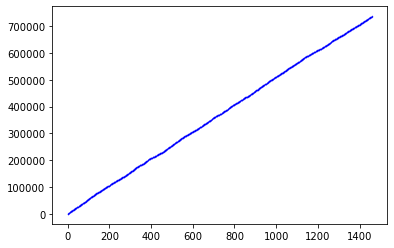

In [104]:
x = data.index.values  
y = data['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

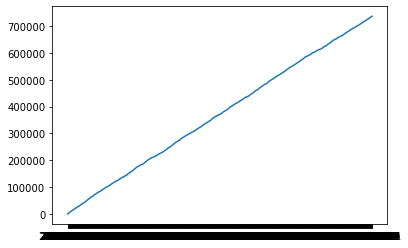

In [103]:
x = data['date']
y = data['value']
plt.plot(x, y)
plt.show()


<AxesSubplot:xlabel='date'>

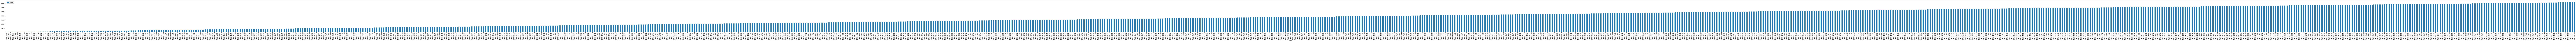

In [102]:
data.plot.bar(x='date', y='value', figsize=(400,5))

In [105]:
data = pd.DataFrame(data['value'], columns=["value"])
# Plot the heatmap
heatmap_plot = sns.heatmap(data, center=0, cmap='gist_ncar')

plt.show()

In [136]:
data = pd.read_csv('C:/pythonushka/my_new_file999.csv')
#print(filtered_state_means[:, 0])
#value2 = []
#value2.append(filtered_state_means[:, 0])
data['value2'] = filtered_state_means[:, 0]
print(data)


data['delta'] = data['value2'].T.diff().fillna(0).astype('float64')  
#print(data['delta'])


data_delta_age_negative = data[data ['delta'] <0]
data.pop('date')
data.pop('value')
#data.pop('delta')
data['index'] = data.index +1
data['index2'] = data.index +1

print(data_delta_age_negative)
print(data)
#print(data[1386:1389])
data.to_csv('C:/pythonushka/kalman.csv', index=False)

            date       value         value2
0     2018-01-01     109.177     109.177000
1     2018-01-02         NaN     109.177000
2     2018-01-03         NaN     109.177000
3     2018-01-04         NaN     109.177000
4     2018-01-05         NaN     109.177000
5     2018-01-06         NaN     109.177000
6     2018-01-07         NaN     109.177000
7     2018-01-08         NaN     109.177000
8     2018-01-09         NaN     109.177000
9     2018-01-10         NaN     109.177000
10    2018-01-11         NaN     109.177000
11    2018-01-12         NaN     109.177000
12    2018-01-13         NaN     109.177000
13    2018-01-14         NaN     109.177000
14    2018-01-15         NaN     109.177000
15    2018-01-16         NaN     109.177000
16    2018-01-17         NaN     109.177000
17    2018-01-18   10612.645   10612.645000
18    2018-01-19   11525.138   11525.138000
19    2018-01-20   11535.608   11535.608000
20    2018-01-21         NaN   11535.608034
21    2018-01-22   12429.195   1

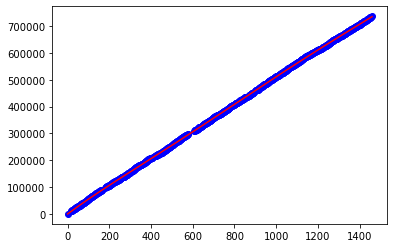

In [107]:
from sklearn.preprocessing import PolynomialFeatures
import datetime
data = pd.read_csv('C:/pythonushka/my_new_file999.csv')
#data
data = data.dropna(inplace=False)
to_timestamp_fct = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp()    
data['date'] = data['date'].apply(to_timestamp_fct)


x = data.index.values  
y = data['value'].values
x = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(x)
poly.fit(X_poly, y)
linreg = LinearRegression()
linreg.fit(X_poly, y)
y_pred = linreg.predict(X_poly)

plt.scatter(x, y, color='blue')
plt.plot(x,y_pred, color='red')



# Kalman

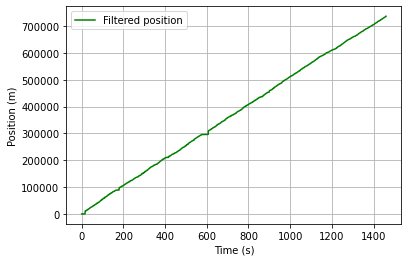

In [126]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma



data = pd.read_csv('C:/pythonushka/my_new_file999.csv')

data['index'] = data.index
data['value'].fillna(0, inplace = True)
# enable or disable missing observations
use_mask = 1

# reading data (quick and dirty)
Time=[]
X=[]

data['value'].fillna(0, inplace=True)
value = data['value'].to_list()
indexer = data['index'].to_list()


for line in indexer:
    f1  = line
    Time.append(float(f1))

for line1 in value:    
    f2 = line1
    X.append(float(f2))

if (use_mask):
    X = ma.asarray(X)
    X = ma.masked_where(X <= 1, X)

    
    
#X = np.vstack(X)
#Time = np.vstack(Y)
#    X = [x if x else float("nan") for x in X]

# Filter Configuration
#print(Time[2])
# time step
dt = Time[2] - Time[1]
#print(dt)
# transition_matrix  
F = [[1,  1.11*dt, 2*dt*dt], 
     [0,   1,      1.11*dt],
     [0,   0,            1]]  

# observation_matrix   
H = [1, 0, 0]

# transition_covariance 
Q = [[   1,     0,     0], 
     [   0,  1e-10,     0],
     [   0,     0,  1e-12]] 

# observation_covariance 
R = [0] # max error = 0 m

# initial_state_mean
X0 = [0,
      0,
      0]

# initial_state_covariance
P0 = [[  1,    0,   0], 
      [  0,    1,   0],
      [  0,    0,   1]]

n_timesteps = len(Time)
n_dim_state = 3



filtered_state_means = np.zeros((n_timesteps, n_dim_state))
filtered_state_covariances = np.zeros((n_timesteps, n_dim_state, n_dim_state))

# Kalman-Filter initialization
kf = KalmanFilter(transition_matrices = F, 
                  observation_matrices = H, 
                  transition_covariance = Q, 
                  observation_covariance = R, 
                  initial_state_mean = X0, 
                  initial_state_covariance = P0)


# iterative estimation for each new measurement

for t in range(n_timesteps):
    filtered_state_means[t], filtered_state_covariances[t] = (
    kf.filter_update(
            filtered_state_means[t-1],
            filtered_state_covariances[t-1],
            observation = X[t])
        )

#position_sigma = np.sqrt(filtered_state_covariances[:, 0, 0]);        


# plot of the resulted trajectory        
plt.plot(Time, filtered_state_means[:, 0], "g-", label="Filtered position", markersize=1)
#plt.plot(Time, filtered_state_means[:, 0] + position_sigma, "r--", label="+ sigma", markersize=1)
#plt.plot(Time, filtered_state_means[:, 0] - position_sigma, "r--", label="- sigma", markersize=2)
plt.grid()
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show() 

In [ ]:
#print(X)
print(Time)

# Гиперпараметр 

In [ ]:
# Tuning Hyperparameter with XGBoost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

from datetime import timedelta, datetime
import xgboost as xgb
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error


df = pd.read_csv('C:/pythonushka/kalman.csv')
df.pop('delta')
df.pop('index')
df.pop('index2')
df['value'] = df['value2']
df.pop('value2')
df['index'] = df.index
df

X = df.drop(['index'], axis=1)
#y = df['index']
y = df.drop(['value'], axis=1)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)

def xgboost_cv_score_ax(parameterization, weight=None):
    NFOLD = 7
    NUM_BOOST_ROUND = 500

    p_names = ['learning_rate', 'max_depth' 'subsample', 'min_split_loss', 'min_child_weight', 'colsample_bytree', 
              'colsample_bylevel', 'colsample_bynode', 'lambda', 'alpha']
    params = {}
    params['objective'] = 'reg:squarederror'
    
    for p in p_names:
        params[p] = parameterization.get(p)
    
    # K-Fold cross validation score.
    cv_results = xgb.cv(dtrain=dtrain,
                        params=params,
                        nfold=NFOLD,
                        num_boost_round=NUM_BOOST_ROUND,
                        metrics="rmse", 
                        as_pandas=True,
                        seed=987)
    
    
    mean = cv_results.tail(1)['test-rmse-mean'].values[0]
    sem = cv_results.tail(1)['test-rmse-std'].values[0]
    
    return mean, sem

parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 1.0],
        "value_type": "float",  # Optional, defaults to inference from type of "bounds".
        "log_scale": False,
    },
    {
        "name": "max_depth",
        "type": "range",
        "bounds": [1, 100],
        "value_type": "int"
    },
    {
        "name": "subsample",
        "type": "range",
        "bounds": [0.0, 1.0],
    },
    {
        "name": "min_split_loss",
        "type": "range",
        "bounds": [0.0, 50.0],
    },
    {
        "name": "min_child_weight",
        "type": "range",
        "bounds": [0.0, 50.0],
    },
    {
        "name": "colsample_bytree",
        "type": "range",
        "bounds": [0.0, 1.0],
    },
    {
        "name": "colsample_bylevel",
        "type": "range",
        "bounds": [0.0, 1.0],
    },
    {
        "name": "colsample_bynode",
        "type": "range",
        "bounds": [0.0, 1.0],
    },
    {
        "name": "lambda",
        "type": "range",
        "bounds": [0.0, 10.0],
    },
    {
        "name": "alpha",
        "type": "range",
        "bounds": [0.0, 10.0],
    },
]

# import more packages
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(
    name="xgboost_experiment",
    parameters=parameters,
    objective_name='xgboost_cv',
    minimize=True)

# objective name has to be xgboost_cv
def evaluate(parameters):
    return {"xgboost_cv": xgboost_cv_score_ax(parameters)}

# how many trials.
# Uses Guassian Processes with Expected Improvement to do the trials. This seems to be the usual way people do hyperparameter tuning.
# Can use other models/strategies, but won't be covering it here.

for i in range(25):
    parameters, trial_index = ax_client.get_next_trial()
    
    # Local evaluation here can be replaced with deployment to external system.
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))


# look at all the trials.
ax_client.get_trials_data_frame().sort_values('trial_index')


best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
print(best_parameters)

print()

# the best score achieved.
means, covariances = values
print(means)

render(ax_client.get_optimization_trace()) 


# can see contour plots for two of the features.

render(ax_client.get_contour_plot(param_x="learning_rate", param_y="max_depth", metric_name="xgboost_cv"))

best_parameters['objective'] = 'reg:squarederror'
xgb_model = xgb.train(params=best_parameters, dtrain=dtrain, num_boost_round=500)

# Use the model to predict the test values.
dtest = xgb.DMatrix(X_test)
xgb_test_pred = xgb_model.predict(dtest)
print(np.sqrt(mean_squared_error(y_test.values, xgb_test_pred)))

#from sklearn import svm, datasets
#from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svc = svm.SVC()
#clf = GridSearchCV(svc, best_parameters)
#clf.fit(iris.data, iris.target)
#GridSearchCV(estimator=SVC(),
#            param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
#sorted(clf.cv_results_.keys())





In [ ]:
#Grid_Search.fit(X, y)

In [ ]:

############################################################
# GridSearchCV

#Random Forest (Bagging of multiple Decision Trees)
#RF = RandomForestClassifier()

# Parameters to try
#Parameter_Trials={'n_estimators':[100,200,300,500,1000],
#                  'criterion':['gini','entropy'],
#                  'max_depth': [2,3]}
#
#Grid_Search = GridSearchCV(RF, best_parameters, cv=5, n_jobs=-1, verbose=5)
#GridSearchResults=Grid_Search.fit(X,y)
#GridSearchResults.best_params_

In [ ]:
#GridSearchResults.best_params_
#GridSearchResults.cv_results_['params']

In [ ]:
# Fetching the best hyperparameters
#print(GridSearchResults.best_params_)

# Looking at all the parameter combinations tried by GridSearch
#GridSearchResults.cv_results_['params']

In [ ]:
# Import necessary modules

# Setup the parameters and distributions to sample from: param_dist

# Instantiate a Decision Tree classifier: tree
#tree = DecisionTreeClassifier()


# Instantiate the RandomizedSearchCV object: tree_cv
#tree_cv = RandomizedSearchCV(tree, best_parameters, cv=5)

# Fit it to the data
#tree_cv.fit(X,y)


# Print the tuned parameters and score
#print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
#print("Best score is {}".format(tree_cv.best_score_))


# Дерево решений (Decision tree)


In [115]:
'''
#from sklearn import tree
#from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#
#data = pd.read_csv('C:/pythonushka/my_new_file999.csv')


X=data.index
Y=data['value']
#data_feature_names = ['height','length of hair']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.25)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
prediction = clf.predict([[]])
print(prediction)
'''

"\n#from sklearn import tree\n#from sklearn.model_selection import train_test_split\n#import matplotlib.pyplot as plt\n#\n#data = pd.read_csv('C:/pythonushka/my_new_file999.csv')\n\n\nX=data.index\nY=data['value']\n#data_feature_names = ['height','length of hair']\nX_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.25)\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(X,Y)\nprediction = clf.predict([[]])\nprint(prediction)\n"